In [34]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model

In [35]:

# Cargar el modelo guardado
modelo = load_model("modelo_keras.h5")

# --- 1. Cargar el archivo PKL y convertir a DataFrame ---
DATASET_PATH  = 'imagenes_entrega_hackaton_2025.pkl'
with open(DATASET_PATH, 'rb') as f:
    data = pickle.load(f)

# Verificar si las imágenes están en formato de array de NumPy
if isinstance(data, list):
    data = np.array(data)

# Asegurar que el formato de las imágenes es el esperado por el modelo (ej. 32x32x1)
data = data.reshape(-1, 32, 32, 1)  # Ajusta según el modelo


print(f"Se cargaron {data.shape[0]} imágenes con tamaño {data.shape[1:]}") 



Se cargaron 100000 imágenes con tamaño (32, 32, 1)


In [36]:
# Verificar si los pesos están cargados correctamente
pesos_capa = modelo.get_weights()

if len(pesos_capa) == 0:
    print("❌ ERROR: El modelo no tiene pesos entrenados.")
else:
    print("✅ El modelo tiene pesos correctamente cargados.")

✅ El modelo tiene pesos correctamente cargados.


In [37]:
# Realizar predicciones
E_pred_proba, a_pred_proba, Q_pred_proba = modelo.predict(data)

# Obtener las clases con mayor probabilidad para cada salida
E_pred = E_pred_proba.argmax(axis=1)  # Predicción de Mecanismo de pérdida de energía
a_pred = a_pred_proba.argmax(axis=1)  # Predicción de Constante de acoplamiento fuerte
Q_pred = Q_pred_proba.argmax(axis=1)  # Predicción de Escala de separación virtual

# Valores reales asociados a los índices de a y Q
valores_a = [0.2, 0.3, 0.4]
valores_Q = [1.0, 1.5, 2.0, 2.5]

# Mapear los índices a los valores reales
a_pred = [valores_a[i] for i in a_pred]
Q_pred = [valores_Q[i] for i in Q_pred]

E_labels = ["MATTER", "MATTER-LBT"]
E_pred = [E_labels[i] for i in E_pred]

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Distribución de predicciones para E: Counter({'MATTER-LBT': 50273, 'MATTER': 49727})
Distribución de predicciones para a: Counter({0.2: 49601, 0.4: 31931, 0.3: 18468})
Distribución de predicciones para Q: Counter({1.0: 54518, 2.5: 23220, 1.5: 11878, 2.0: 10384})


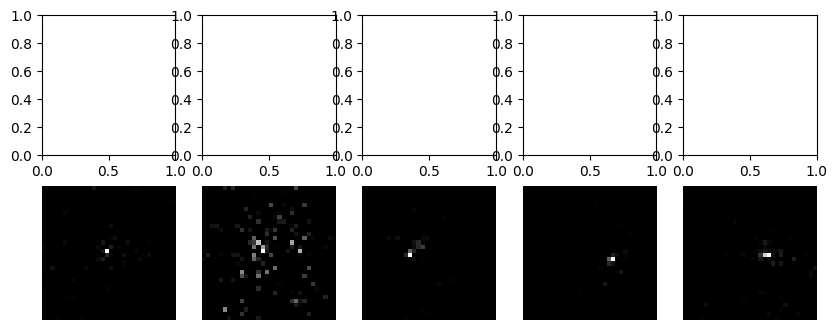

In [38]:
from collections import Counter

# Contar cuántas veces se predice cada clase
print("Distribución de predicciones para E:", Counter(E_pred))
print("Distribución de predicciones para a:", Counter(a_pred))
print("Distribución de predicciones para Q:", Counter(Q_pred))

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# 5 imágenes del dataset de predicción
for i in range(5):
    axes[1, i].imshow(data[i].reshape(32, 32), cmap="gray")
    axes[1, i].axis("off")

plt.show()

In [39]:
import pandas as pd

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame({
    "E_pred": E_pred,  # Etiquetas de MATTER o MATTER-LBT
    "a_pred": a_pred,  # Valores reales de a
    "Q_pred": Q_pred   # Valores reales de Q
})

# Guardar en un CSV con separador `;`
df_resultados.to_csv("resultados_predicciones.csv", sep=";", index=False)

print("✅ Resultados guardados en 'resultados_predicciones.csv'.")

✅ Resultados guardados en 'resultados_predicciones.csv'.
